In [1]:
import torch
# from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
from transformers import BertTokenizer, BertModel, BertForMaskedLM

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


## example playground

In [19]:
def embed_texts(texts, model, tokeniser, num_hiddens=4, maxlen=128):
    inputs = tokeniser(texts, padding=True, truncation=True, max_length=maxlen, pad_to_multiple_of=maxlen, return_tensors='pt')
    inputs['input_ids'] = inputs['input_ids'].to("cuda")
    inputs['attention_mask'] = inputs['attention_mask'].to("cuda")
    inputs['token_type_ids'] = inputs['token_type_ids'].to("cuda")
    with torch.no_grad():
        outputs = model(**inputs)
    return torch.cat([layer.unsqueeze(0) for layer in outputs[2][-4:]]).mean(dim=[0,2])

In [5]:
model.to("cuda")

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [20]:
%%timeit
embed_texts(text_batch, model, tokenizer, maxlen=50)

7.89 ms ± 44.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1]:
from transformers import AutoTokenizer, BertModel, BertConfig

In [2]:
text_batch = ["what's up with you today ?", "hello world !", "how are you doing today ?"]

In [3]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [4]:
config = BertConfig.from_pretrained('bert-base-uncased', output_hidden_states=True)
model = BertModel.from_pretrained('bert-base-uncased', config=config)

In [40]:
inputs = tokenizer(text_batch, padding=True, truncation=True, max_length=50, pad_to_multiple_of=50, return_tensors='pt')

In [41]:
outputs = model(**inputs)

In [8]:
import torch

In [60]:
aa = torch.cat([layer.unsqueeze(0) for layer in outputs[2][-4:]])

In [65]:
outputs[2][-1] 

tensor([[[ 3.6976e-01,  1.0468e-01, -1.4612e-01,  ..., -5.6408e-01,
           4.1560e-01, -2.7133e-02],
         [ 7.5136e-01, -4.9792e-01,  1.6496e-01,  ...,  3.3014e-01,
           2.5959e-01, -5.4828e-01],
         [ 1.1475e+00, -3.9137e-01,  9.5390e-01,  ..., -4.2770e-01,
           2.9030e-01, -5.4206e-01],
         ...,
         [ 3.1620e-01, -1.6403e-01, -7.0130e-04,  ...,  7.5811e-02,
           1.6194e-01, -4.7568e-01],
         [-4.1781e-02, -3.6421e-01, -6.5790e-01,  ...,  3.7247e-01,
           5.2277e-01, -4.3751e-01],
         [ 1.1585e-01, -3.4933e-01, -5.8629e-01,  ...,  3.6592e-01,
           3.8491e-01, -6.0045e-01]],

        [[-1.4241e-01,  1.3354e-01, -1.2907e-01,  ..., -3.5968e-01,
          -5.6223e-02,  3.6050e-01],
         [-3.5065e-01,  1.0420e-01,  6.2445e-01,  ..., -1.7610e-01,
           4.8340e-01,  6.4435e-02],
         [-2.4513e-01, -1.5732e-01,  6.9452e-01,  ..., -5.6545e-01,
          -8.9399e-02, -1.8564e-01],
         ...,
         [-3.7155e-01, -1

In [61]:
aa.shape

torch.Size([4, 3, 50, 768])

In [64]:
aa.mean(dim=[0,2]).shape

torch.Size([3, 768])

In [54]:
outputs[2][-1].shape

torch.Size([3, 50, 768])

In [23]:
outputs[0][0].mean(axis=0)

tensor([ 1.7253e-01, -2.7076e-01, -6.5027e-02, -1.3390e-01,  1.5993e-01,
        -5.8235e-01,  2.6562e-01,  5.3476e-01, -2.4954e-01,  2.4915e-03,
         2.6613e-01, -2.2889e-01, -1.6627e-01,  2.9992e-01, -1.8342e-01,
         3.9602e-01,  4.6814e-01,  2.6224e-01, -2.0788e-01,  3.9021e-01,
        -6.9101e-02,  7.9177e-02, -1.2817e-01,  1.5459e-01,  2.7015e-01,
        -1.2630e-01, -4.4452e-01, -3.1085e-02,  8.1686e-02,  5.3798e-02,
         1.4821e-01,  6.4809e-02, -8.3380e-02,  1.2476e-01, -2.7359e-02,
         1.6790e-01, -2.4641e-01, -2.5840e-01, -2.3039e-01, -1.7364e-02,
        -9.5702e-01, -6.5898e-01, -3.1682e-01, -6.8927e-02, -5.2936e-02,
        -2.2041e-01,  5.4136e-01, -4.7485e-01, -3.3888e-01, -2.1948e-01,
         2.8569e-01,  4.7347e-01, -2.2099e-01,  1.2541e-01, -5.0365e-01,
        -3.2506e-02,  6.0827e-02, -8.4027e-01, -4.3488e-01, -1.2858e-01,
         8.2173e-02, -1.4421e-01,  3.2299e-02,  1.5845e-02,  3.6986e-01,
        -1.9851e-02,  2.6712e-01,  6.1869e-02, -3.2

In [20]:
outputs[1][0]

tensor([-9.5958e-01, -5.4615e-01, -9.5707e-01,  9.0897e-01,  8.4627e-01,
        -2.9216e-01,  9.5695e-01,  4.5178e-01, -9.0960e-01, -1.0000e+00,
        -7.2448e-01,  9.8517e-01,  9.8912e-01,  6.7986e-01,  9.7927e-01,
        -9.2129e-01, -6.6327e-01, -7.0798e-01,  2.4594e-01, -7.2341e-01,
         7.9483e-01,  1.0000e+00, -9.3050e-02,  4.2266e-01,  5.7776e-01,
         9.9829e-01, -9.2571e-01,  9.8060e-01,  9.7957e-01,  7.4481e-01,
        -8.4806e-01,  2.1180e-01, -9.9392e-01, -3.2780e-01, -9.4844e-01,
        -9.9534e-01,  4.3679e-01, -8.2690e-01, -3.3679e-02, -6.8830e-02,
        -9.4414e-01,  3.3245e-01,  1.0000e+00,  8.4269e-02,  3.8772e-01,
        -3.0375e-01, -1.0000e+00,  3.7404e-01, -9.3661e-01,  9.7277e-01,
         9.5867e-01,  9.5275e-01,  2.2533e-01,  5.7421e-01,  5.4911e-01,
        -3.1368e-01, -4.3975e-02,  3.4750e-02, -2.8948e-01, -6.9194e-01,
        -6.7160e-01,  5.5497e-01, -9.4354e-01, -9.3398e-01,  9.8511e-01,
         9.0528e-01, -2.1441e-01, -3.3301e-01, -1.6

In [11]:
outputs.last_hidden_state.shape

torch.Size([3, 50, 768])

In [5]:
inputs = tokenizer(text_batch, return_tensors="pt")

ValueError: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length.

In [ ]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [5]:
text = "Here is the sentence I want embeddings for."
text = "After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank."
marked_text = "[CLS] " + text + " [SEP]"

print (marked_text)

[CLS] After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank. [SEP]


In [6]:
tokenized_text = tokenizer.tokenize(marked_text)
print (tokenized_text)

['[CLS]', 'after', 'stealing', 'money', 'from', 'the', 'bank', 'vault', ',', 'the', 'bank', 'robber', 'was', 'seen', 'fishing', 'on', 'the', 'mississippi', 'river', 'bank', '.', '[SEP]']


In [7]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [8]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

for tup in zip(tokenized_text, indexed_tokens):
    print (tup)

('[CLS]', 101)
('after', 2044)
('stealing', 11065)
('money', 2769)
('from', 2013)
('the', 1996)
('bank', 2924)
('vault', 11632)
(',', 1010)
('the', 1996)
('bank', 2924)
('robber', 27307)
('was', 2001)
('seen', 2464)
('fishing', 5645)
('on', 2006)
('the', 1996)
('mississippi', 5900)
('river', 2314)
('bank', 2924)
('.', 1012)
('[SEP]', 102)


In [9]:
segments_ids = [1] * len(tokenized_text)
print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [10]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=

In [12]:
%%timeit
# Predict hidden states features for each layer
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)

The slowest run took 8.70 times longer than the fastest. This could mean that an intermediate result is being cached.
831 ms ± 453 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
print ("Number of layers:", len(encoded_layers))
layer_i = 0

print ("Number of batches:", len(encoded_layers[layer_i]))
batch_i = 0

print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))

Number of layers: 12
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


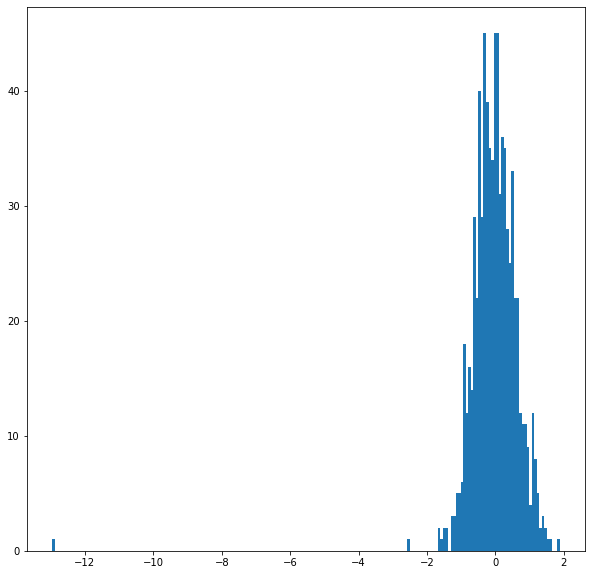

In [32]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec.cpu(), bins=200)
plt.show()

In [33]:
# Convert the hidden state embeddings into single token vectors

# Holds the list of 12 layer embeddings for each token
# Will have the shape: [# tokens, # layers, # features]
token_embeddings = [] 

# For each token in the sentence...
for token_i in range(len(tokenized_text)):
  
    # Holds 12 layers of hidden states for each token 
    hidden_layers = [] 
  
    # For each of the 12 layers...
    for layer_i in range(len(encoded_layers)):
    
        # Lookup the vector for `token_i` in `layer_i`
        vec = encoded_layers[layer_i][batch_i][token_i]
    
        hidden_layers.append(vec)
    
    token_embeddings.append(hidden_layers)

# Sanity check the dimensions:
print ("Number of tokens in sequence:", len(token_embeddings))
print ("Number of layers per token:", len(token_embeddings[0]))

Number of tokens in sequence: 22
Number of layers per token: 12


In [34]:
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat = []

# For each token in the sentence...
for token in token_embeddings:
    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), 0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 22 x 3072


In [35]:
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []

# For each token in the sentence...
for token in token_embeddings:
    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(torch.stack(token)[-4:], 0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 22 x 768


In [36]:
sentence_embedding = torch.mean(encoded_layers[11], 1)

## Organised embeddings

In [2]:
def raw_embed_sentence(sent, model, tokenizer):
    '''returns a list (with length same as number of layers) of tensors each of shape 
    [batch_size, len of tokenised sent (+2), hidden state shape]'''
    if isinstance(sent, str) is False:
        print(sent)
    # add special start and end tokens
    marked_text = "[CLS] " + sent + " [SEP]"
    
    # tokenise text
    tokenized_text = tokenizer.tokenize(marked_text)
    
    # turn tokens into BERT number ids
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    
    # generate token used to indicate that all words are from the same sent
    segments_ids = [1] * len(tokenized_text)
    
    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    # Put the model in "evaluation" mode, meaning feed-forward operation.
    model.eval()
    
    # Predict hidden states features for each layer
    with torch.no_grad():
        print(tokens_tensor)
        encoded_layers, _ = model(tokens_tensor, segments_tensors)
        print("encoded", len(encoded_layers), encoded_layers[0].shape)
        print(_)
        print(encoded_layers)
    return encoded_layers

In [9]:
def embed_sentence_mean_layer11(sent, model, tokenizer):
    encoded_layers = raw_embed_sentence(sent, model, tokenizer)
    return torch.mean(encoded_layers, 1)

In [3]:
def embed_sentence_mean_layer11(sent, model, tokenizer):
    encoded_layers = raw_embed_sentence(sent, model, tokenizer)
    return torch.mean(encoded_layers[11], 1)

In [17]:
# # Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

b = embed_sentence_mean_layer11("awesome was this movie", model, tokenizer)

tensor([[  101, 12476,  2001,  2023,  3185,   102]])
encoded 12 torch.Size([1, 6, 768])
tensor([[-0.6578, -0.2301,  0.5664,  0.2902, -0.4416, -0.1039,  0.5521,  0.1852,
          0.2588, -0.9955,  0.2026,  0.1015,  0.9470, -0.5158,  0.6793, -0.0984,
         -0.0680, -0.3631,  0.3193, -0.1651,  0.2337,  0.3335,  0.5986,  0.1670,
          0.2544, -0.1337, -0.5863,  0.7485,  0.8689,  0.5938, -0.3730,  0.2113,
         -0.9520, -0.1433,  0.4930, -0.9439,  0.0173, -0.5513,  0.1341,  0.0446,
         -0.6650,  0.2010,  0.9348, -0.4095, -0.2550, -0.2620, -0.9760,  0.0578,
         -0.6820, -0.5918, -0.5665, -0.6967,  0.0738,  0.1732,  0.2821,  0.4861,
         -0.1203,  0.1568, -0.0574, -0.4140, -0.4608,  0.1571,  0.2286, -0.7045,
         -0.3777, -0.5752, -0.0884, -0.0336,  0.0247, -0.0897,  0.6677,  0.1309,
          0.4357, -0.5596, -0.5488,  0.1474, -0.2535,  0.9978, -0.0817, -0.9218,
         -0.2290, -0.2923,  0.1060,  0.6289, -0.6815, -0.9924,  0.1253, -0.0567,
         -0.9580,  0.

In [10]:
# # Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

b = embed_sentence_mean_layer11("awesome was this movie", model, tokenizer)

tensor([[  101, 12476,  2001,  2023,  3185,   102]])
encoded 1 torch.Size([6, 768])
tensor([[-8.4071e-01, -2.5620e-01,  2.7098e-01,  5.6198e-01, -1.0199e-01,
         -1.3761e-01,  8.1588e-01,  1.6933e-01, -1.6499e-02, -9.9948e-01,
          1.7728e-02,  4.5266e-01,  9.5724e-01, -2.8368e-01,  8.6791e-01,
         -4.5208e-01, -2.6012e-01, -4.4431e-01,  3.2822e-01, -6.3699e-01,
          4.7634e-01,  8.8808e-01,  6.0551e-01,  1.9023e-01,  3.3571e-01,
          5.8984e-01, -6.3266e-01,  8.7245e-01,  9.1427e-01,  5.8373e-01,
         -5.5130e-01,  1.3810e-01, -9.5917e-01, -1.5259e-01,  2.9504e-01,
         -9.6428e-01,  1.0432e-01, -7.2401e-01,  1.0018e-01,  3.2127e-02,
         -8.0474e-01,  1.8206e-01,  9.9082e-01, -3.6956e-01, -2.3794e-01,
         -2.7829e-01, -9.9969e-01,  1.4882e-01, -7.6032e-01, -1.8868e-01,
         -1.7025e-01, -3.4416e-01,  1.4183e-01,  3.1765e-01,  3.1312e-01,
          3.6314e-01, -1.1273e-01,  1.2589e-01, -8.4020e-02, -4.6947e-01,
         -4.8408e-01,  1.277

In [11]:
b.shape

torch.Size([1, 768])

In [38]:
tokenizer.tokenize('hello <oov> world')

['hello', '<', 'o', '##ov', '>', 'world']

## classifier 

### imports

In [1]:
# general
import pandas as pd
import numpy as np

# dataset & loader
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

# net
import torch.nn as nn
import torch.nn.functional as F

# optimiser
import torch.optim as optim

In [15]:
import nltk

### constants

In [7]:
data_path = "preprocess-data/aclImdb/imdb"

# make sure on cuda & efficient
# torch.set_default_tensor_type('torch.cuda.FloatTensor')
dtype = torch.cuda.FloatTensor

### dataset & loader

In [8]:
class SentenceDataset(Dataset):
    def __init__(self, file_name, embed_func, numrows=None):
        self.file_data = pd.read_csv(file_name, nrows=numrows)
        self.file_data = self.file_data.dropna()  # drop all nan values
        self.embed_func = embed_func
        
    def __len__(self):
        return len(self.file_data)

    def __getitem__(self, idx):
        text = self.file_data.iloc[idx, 0]
        label = torch.from_numpy(self.file_data.iloc[idx, 1:].values.astype(np.int))
        return self.embed_func(text), label.view(-1)

In [9]:
# datasets
train_sent_dataset = SentenceDataset(data_path+"_train_clean.csv", lambda sent: embed_sentence_mean_layer11(sent, model, tokenizer))
test_sent_dataset = SentenceDataset(data_path+"_test_clean.csv", lambda sent: embed_sentence_mean_layer11(sent, model, tokenizer))

# dataloaders
train_dataloader = DataLoader(train_sent_dataset, batch_size=32, num_workers=8, shuffle=True)
valid_dataloader = DataLoader(test_sent_dataset, batch_size=32, num_workers=8, shuffle=False)

this shows data and label shape

In [10]:
for i, data in enumerate(train_dataloader, 0):
    print(i, data[0].shape, data[1].shape)

0 torch.Size([32, 1, 768]) torch.Size([32, 1])
1 torch.Size([32, 1, 768]) torch.Size([32, 1])
2 torch.Size([32, 1, 768]) torch.Size([32, 1])
3 torch.Size([32, 1, 768]) torch.Size([32, 1])
4 torch.Size([32, 1, 768]) torch.Size([32, 1])
5 torch.Size([32, 1, 768]) torch.Size([32, 1])
6 torch.Size([32, 1, 768]) torch.Size([32, 1])
7 torch.Size([32, 1, 768]) torch.Size([32, 1])


KeyboardInterrupt: 

### net and optimiser

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(768, 400)
        self.fc2 = nn.Linear(400, 2)
        
    def forward(self, x):
        x = x.view(-1, 768)
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)  # softmax is built in to loss
        return x


net = Net()
net.cuda()

Net(
  (fc1): Linear(in_features=768, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=2, bias=True)
)

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

### training

In [13]:
def val_metrics():
    running_accuracy = 0.0
    running_loss = 0.0
    for i, data in enumerate(valid_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # forward
        inputs = inputs.type(dtype)
        with torch.no_grad():
            net.eval()
            outputs = net(inputs)
        labels = labels.type(torch.cuda.LongTensor)
        loss = criterion(outputs, labels.view(-1))

        _, preds = outputs.max(1)
        running_accuracy += ((preds == labels.view(-1)).sum().to(dtype=torch.float)/len(outputs)).item()


        # print statistics
        running_loss += loss.item()
    # loss
    print('[%d, %5d] val loss: %.3f' %
          (1, i + 1, running_loss / (i+1)))

    # accuracy
    print('[%d, %5d] val accuracy: %.3f' %
          (1, i + 1, running_accuracy / (i+1)))


In [21]:
for epoch in range(1):  # loop over the dataset multiple times
    running_accuracy = 0.0
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        inputs = inputs.type(dtype)
        outputs = net(inputs)
        labels = labels.type(torch.cuda.LongTensor)
        loss = criterion(outputs, labels.view(-1))
        loss.backward()
        optimizer.step()
        
        _, preds = outputs.max(1)
        running_accuracy += ((preds == labels.view(-1)).sum().to(dtype=torch.float)/len(outputs)).item()
        
        
        # print statistics
        n = 50
        running_loss += loss.item()
        if i % n == n-1:    # print every n mini-batches
            # loss
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / n))
            running_loss = 0.0
            
            # accuracy
            print('[%d, %5d] accuracy: %.3f' %
                  (epoch + 1, i + 1, running_accuracy / n))
            running_accuracy = 0.0
    val_metrics()
print('Finished Training')

[1,    50] loss: 0.286
[1,    50] accuracy: 0.881
[1,   100] loss: 0.260
[1,   100] accuracy: 0.892
[1,   150] loss: 0.271
[1,   150] accuracy: 0.884
[1,   200] loss: 0.276
[1,   200] accuracy: 0.888
[1,   250] loss: 0.264
[1,   250] accuracy: 0.893
[1,   300] loss: 0.274
[1,   300] accuracy: 0.886
[1,   350] loss: 0.288
[1,   350] accuracy: 0.882
[1,   400] loss: 0.278
[1,   400] accuracy: 0.887
[1,   450] loss: 0.271
[1,   450] accuracy: 0.891
[1,   464] val loss: 0.276
[1,   464] val accuracy: 0.885
Finished Training


In [24]:
for epoch in range(1):  # loop over the dataset multiple times
    running_accuracy = 0.0
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        inputs = inputs.type(dtype)
        outputs = net(inputs)
        labels = labels.type(torch.cuda.LongTensor)
        loss = criterion(outputs, labels.view(-1))
        loss.backward()
        optimizer.step()
        
        _, preds = outputs.max(1)
        running_accuracy += ((preds == labels.view(-1)).sum().to(dtype=torch.float)/len(outputs)).item()
        
        
        # print statistics
        n = 50
        running_loss += loss.item()
        if i % n == n-1:    # print every n mini-batches
            # loss
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / n))
            running_loss = 0.0
            
            # accuracy
            print('[%d, %5d] accuracy: %.3f' %
                  (epoch + 1, i + 1, running_accuracy / n))
            running_accuracy = 0.0
    val_metrics()
print('Finished Training')

[1,    50] loss: 0.283
[1,    50] accuracy: 0.886
[1,   100] loss: 0.271
[1,   100] accuracy: 0.889
[1,   150] loss: 0.257
[1,   150] accuracy: 0.894
[1,   200] loss: 0.284
[1,   200] accuracy: 0.882
[1,   250] loss: 0.273
[1,   250] accuracy: 0.891
[1,   300] loss: 0.274
[1,   300] accuracy: 0.877
[1,   350] loss: 0.279
[1,   350] accuracy: 0.888
[1,   400] loss: 0.261
[1,   400] accuracy: 0.893
[1,   450] loss: 0.262
[1,   450] accuracy: 0.896
[1,   464] val loss: 0.277
[1,   464] val accuracy: 0.885
Finished Training


### saving model

In [22]:
torch.save(net.state_dict(), 'preprocess-data/aclImdb/imdb.pth')

### inference example

In [48]:
# embed_sent = embed_sentence_mean_layer11("I wouldn't wait one more second to see this movie, nor would I reccomnd you to", model, tokenizer)
# embed_sent = embed_sentence_mean_layer11("I have never experienced glee, nor happiness as passionately as in this movie", model, tokenizer)
embed_sent = embed_sentence_mean_layer11("are creatures born , or made ?", model, tokenizer)
embed_sent = embed_sent.type(dtype)
net.load_state_dict(torch.load('preprocess-data/rt-polaritydata/polarity.pth'))
F.softmax(net(embed_sent).detach().cpu()).numpy()

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [11]:
embed_sent = embed_sentence_mean_layer11("good", model, tokenizer)
embed_sent = embed_sent.type(dtype)
net(embed_sent).detach().cpu().numpy()

array([[-0.99025303,  0.92271733]], dtype=float32)

### predict on test

In [28]:
base_path = 'preprocess-data/aclImdb/imdb'
model_path = base_path + '.pth'
tst_path = base_path + '_test_clean.csv'
out_path = base_path + '_test_pred.csv'

load model

In [29]:
net.load_state_dict(torch.load(model_path))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [30]:
tst_df = pd.read_csv(tst_path)
tst_df = tst_df.dropna()

In [31]:
print(tst_df.shape)
tst_df.sample(5)

(14835, 2)


,content,label
7120,"ah , how refreshing to see a vision of 18th ce...",1
5224,what a trip down memory lane . do not look for...,1
562,"although it is more of a kids movie , it still...",1
1470,"at first , i honestly thought it would be a co...",1
7547,james cagney plays richard gargan ( nicknamed ...,0


In [32]:
# datasets
test_sent_dataset = SentenceDataset(tst_path, lambda sent: embed_sentence_mean_layer11(sent, model, tokenizer))

# dataloaders
valid_dataloader = DataLoader(test_sent_dataset, batch_size=32, num_workers=8, shuffle=False)

In [33]:
pred_list = []

for data in valid_dataloader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # forward + backward + optimize
        inputs = inputs.type(dtype)
        with torch.no_grad():
            outputs = net(inputs)
        _, preds = outputs.max(1)
        pred_list.append(preds.cpu().numpy())
        
tst_df['preds'] = np.concatenate(pred_list)

In [34]:
(tst_df['preds']==tst_df['label']).sum()/len(tst_df)

0.8848668688911359

In [37]:
out_path

'preprocess-data/aclImdb/imdb_test_pred.csv'

In [35]:
tst_df.to_csv(out_path, index=False)